In [98]:
import numpy as np


class LayerDense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = .01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights)
        
class ActivationSigmoid:
    def forward(self, inputs):
        self.output = 1 / (1 + np.exp(-inputs))

class ActivationReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        

class ActivationSoftmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs,axis = 1, keepdims=True))
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True) 
        
class Loss:
    def calclate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss
        
class LossCategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        
        y_pred = np.clip(y_pred, 1e-7, 1)
        #for label encoded vlaues
        if len(y_true.shape) == 1:
            correct_proba = y_pred[:, y_true]
        
        #for one hot encoded
        elif len(y_true.shape) == 2:
            correct_proba = np.sum(y_pred * y_true , axis=1)
        
        cross_entropy = -np.log(correct_proba)
        return cross_entropy

In [ ]:
[[1,0,0],
 [0,0,1]] 

In [66]:
np.exp(-np.inf)


0.0

In [67]:
x = [[1,2,3],
     [4,5,6]]
np.sum(x, axis= 1, keepdims=True)

array([[ 6],
       [15]])

In [68]:
v = [[12, 14,0],
     [13,18,30]]
exp_v = np.exp(v)
prob = exp_v / np.sum(exp_v, axis=1, keepdims=True)
prob

array([[1.19202835e-01, 8.80796433e-01, 7.32407530e-07],
       [4.13991211e-08, 6.14417435e-06, 9.99993814e-01]])

In [69]:
1.52298836e-08 +  1.12534464e-07 + 9.35756389e-14

1.277644411756389e-07

In [70]:
import pandas as pd

data = pd.read_csv("spiral_data.csv")
X = data.drop("y", axis = 1)
y = data["y"]


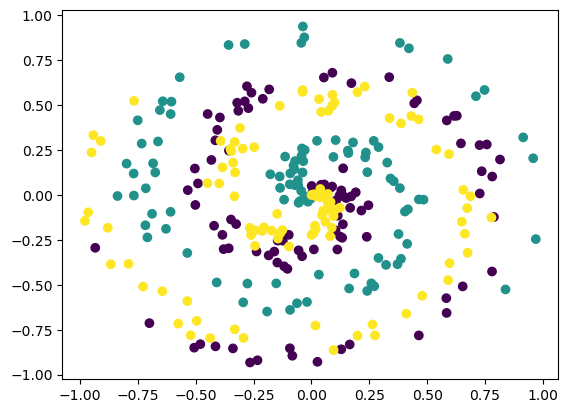

In [71]:
import matplotlib.pyplot as plt
plt.scatter(X["feature 1"], X["feature 2"], c = y)

In [101]:
layer1 = LayerDense(2, 64)
activation1 = ActivationReLU()
layer2 = LayerDense(64, 30)
activation2 = ActivationReLU()
layer3 = LayerDense(30, 3)
activation3 = ActivationSoftmax()
layer1.forward(X)
activation1.forward(layer1.output)
layer2.forward(activation1.output)
activation2.forward(layer2.output)
layer3.forward(activation2.output)
activation3.forward(layer3.output)

loss_function = LossCategoricalCrossentropy()
loss = loss_function.calclate(activation3.output, y)
activation3.output

array([[0.33333333, 0.33333333, 0.33333333],
       [0.3333334 , 0.3333333 , 0.3333333 ],
       [0.33333347, 0.33333328, 0.33333325],
       [0.33333341, 0.33333322, 0.33333337],
       [0.33333346, 0.3333332 , 0.33333334],
       [0.33333372, 0.33333315, 0.33333313],
       [0.33333365, 0.3333332 , 0.33333314],
       [0.33333379, 0.33333315, 0.33333306],
       [0.33333387, 0.33333311, 0.33333302],
       [0.3333338 , 0.33333313, 0.33333307],
       [0.33333387, 0.33333312, 0.33333301],
       [0.33333361, 0.33333261, 0.33333378],
       [0.33333363, 0.33333276, 0.33333362],
       [0.33333369, 0.33333289, 0.33333342],
       [0.33333367, 0.33333262, 0.33333371],
       [0.3333337 , 0.33333253, 0.33333378],
       [0.3333342 , 0.33333245, 0.33333335],
       [0.33333375, 0.33333249, 0.33333376],
       [0.33333387, 0.33333208, 0.33333404],
       [0.33333382, 0.33333254, 0.33333365],
       [0.33333467, 0.33333278, 0.33333254],
       [0.33333462, 0.33333229, 0.33333309],
       [0.

In [97]:
len(X.shape)

2